In [3]:
import numpy as np
from datascience import *

# Configure notebook (happens automatically on data8.berkeley.edu)
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Configure for presentation
np.set_printoptions(threshold=50, linewidth=50)
import matplotlib as mpl
mpl.rc('font', size=16)

In [4]:
free_trips = Table.read_table("trip.csv").where('Duration', are.below(1800)).select([3, 6, 1])
free_trips

Start Station,End Station,Duration
Harry Bridges Plaza (Ferry Building),San Francisco Caltrain (Townsend at 4th),765
San Antonio Shopping Center,Mountain View City Hall,1036
Post at Kearny,2nd at South Park,307
San Jose City Hall,San Salvador at 1st,409
Embarcadero at Folsom,Embarcadero at Sansome,789
Yerba Buena Center of the Arts (3rd @ Howard),San Francisco Caltrain (Townsend at 4th),293
Embarcadero at Folsom,Embarcadero at Sansome,896
Embarcadero at Sansome,Steuart at Market,255
Beale at Market,Temporary Transbay Terminal (Howard at Beale),126
Post at Kearny,South Van Ness at Market,932


In [5]:
np.average(free_trips.column('Duration'))

550.00143345658103

In [6]:
n = 100
samples = Table(['Sample #', 'Duration'])
for i in np.arange(40):
    for trip in free_trips.sample(n).rows:
        samples.append([i, trip.item('Duration')])
samples

Sample #,Duration
0,632
0,201
0,536
0,480
0,146
0,453
0,331
0,329
0,442
0,513


In [7]:
for i in np.arange(3):
    avg = np.average(samples.where(0, i).column(1))
    print("Sample", i, "average is", avg)

Sample 0 average is 540.14
Sample 1 average is 562.98
Sample 2 average is 601.01


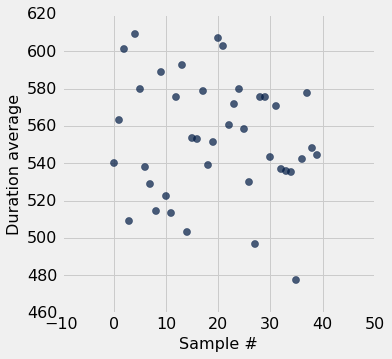

In [8]:
samples.group(0, np.average).scatter(0, 1, s=50)

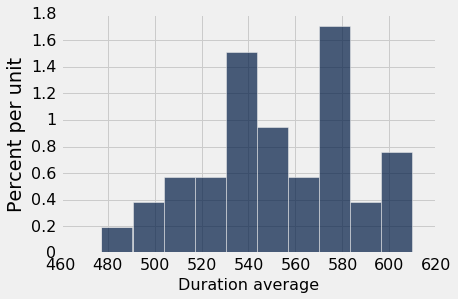

In [9]:
samples.group(0, np.average).hist(1)

In [43]:
averages = np.sort(samples.group(0, np.average).column(1))
lower = averages.item(1)
upper = averages.item(38)
print('Empirically, 95% within', lower, 'to', upper)

Empirically, 95% within 496.67 to 607.01


In [45]:
max_deviation = np.ceil(max(550-lower, upper-550))
print('Empirically, the sample average is 550 +/-', max_deviation, 'for 95% of samples')

Empirically, the sample average is 550 +/- 58.0 for 95% of samples


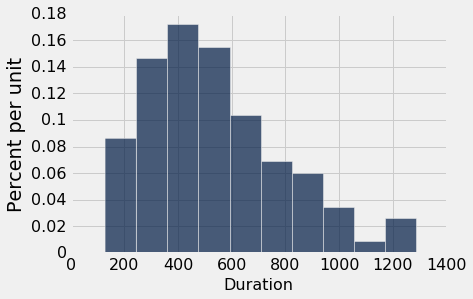

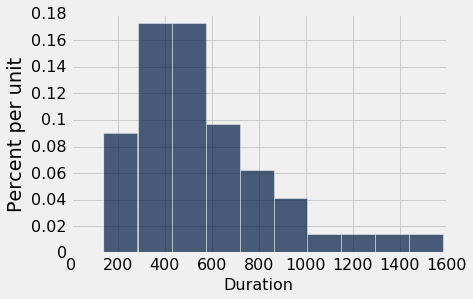

In [11]:
samples.where('Sample #', 0).hist(1)
samples.where('Sample #', 1).hist(1)

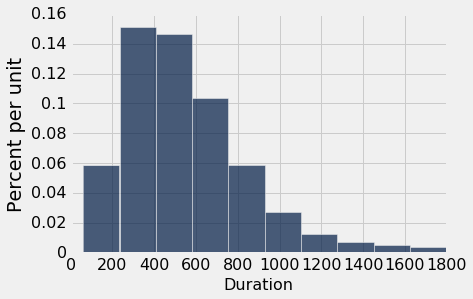

In [12]:
free_trips.hist(2)

### Resampling

In [13]:
sample = samples.where("Sample #", 0)
sample_average = np.average(sample.column('Duration'))
sample_average

540.13999999999999

In [14]:
resamples = Table(['Resample #', 'Duration'])
for i in np.arange(40):
    for trip in sample.sample(n, with_replacement=True).rows:
        resamples.append([i, trip.item('Duration')])
resamples

Resample #,Duration
0,605
0,1238
0,673
0,296
0,958
0,333
0,329
0,358
0,793
0,400


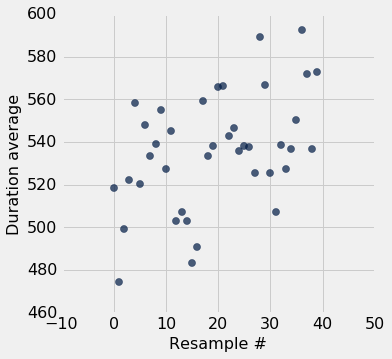

In [15]:
resamples.group(0, np.average).scatter(0, 1, s=50)

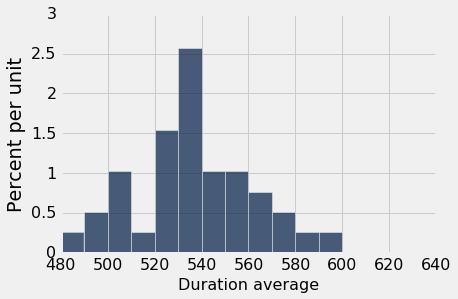

In [16]:
resamples.group(0, np.average).hist(1, bins=np.arange(480, 641, 10))